In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import io

In [0]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [0]:
import math
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from google.colab import files
uploaded = files.upload()

Saving complete.csv to complete (1).csv


In [0]:
covid = pd.read_csv(io.BytesIO(uploaded['complete.csv']))

In [0]:
covid.head()

,Date,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured/Discharged/Migrated,Latitude,Longitude,Death,Total Confirmed cases
0,2020-01-30,Kerala,1,0,0,10.8505,76.2711,0,1
1,2020-01-31,Kerala,1,0,0,10.8505,76.2711,0,1
2,2020-02-01,Kerala,2,0,0,10.8505,76.2711,0,2
3,2020-02-02,Kerala,3,0,0,10.8505,76.2711,0,3
4,2020-02-03,Kerala,3,0,0,10.8505,76.2711,0,3


In [0]:
covid.isnull().sum()

Date                                          0
Name of State / UT                            0
Total Confirmed cases (Indian National)       0
Total Confirmed cases ( Foreign National )    0
Cured/Discharged/Migrated                     0
Latitude                                      0
Longitude                                     0
Death                                         0
Total Confirmed cases                         0
dtype: int64

In [0]:
covid.columns

Index(['Date', 'Name of State / UT', 'Total Confirmed cases (Indian National)',
       'Total Confirmed cases ( Foreign National )',
       'Cured/Discharged/Migrated', 'Latitude', 'Longitude', 'Death',
       'Total Confirmed cases'],
      dtype='object')

In [0]:
dates=list(pd.to_datetime(covid['Date']))
dates

[Timestamp('2020-01-30 00:00:00'),
 Timestamp('2020-01-31 00:00:00'),
 Timestamp('2020-02-01 00:00:00'),
 Timestamp('2020-02-02 00:00:00'),
 Timestamp('2020-02-03 00:00:00'),
 Timestamp('2020-02-04 00:00:00'),
 Timestamp('2020-02-05 00:00:00'),
 Timestamp('2020-02-06 00:00:00'),
 Timestamp('2020-02-07 00:00:00'),
 Timestamp('2020-02-08 00:00:00'),
 Timestamp('2020-02-09 00:00:00'),
 Timestamp('2020-02-10 00:00:00'),
 Timestamp('2020-02-11 00:00:00'),
 Timestamp('2020-02-12 00:00:00'),
 Timestamp('2020-02-13 00:00:00'),
 Timestamp('2020-02-14 00:00:00'),
 Timestamp('2020-02-15 00:00:00'),
 Timestamp('2020-02-16 00:00:00'),
 Timestamp('2020-02-17 00:00:00'),
 Timestamp('2020-02-18 00:00:00'),
 Timestamp('2020-02-19 00:00:00'),
 Timestamp('2020-02-20 00:00:00'),
 Timestamp('2020-02-21 00:00:00'),
 Timestamp('2020-02-22 00:00:00'),
 Timestamp('2020-02-23 00:00:00'),
 Timestamp('2020-02-24 00:00:00'),
 Timestamp('2020-02-25 00:00:00'),
 Timestamp('2020-02-26 00:00:00'),
 Timestamp('2020-02-

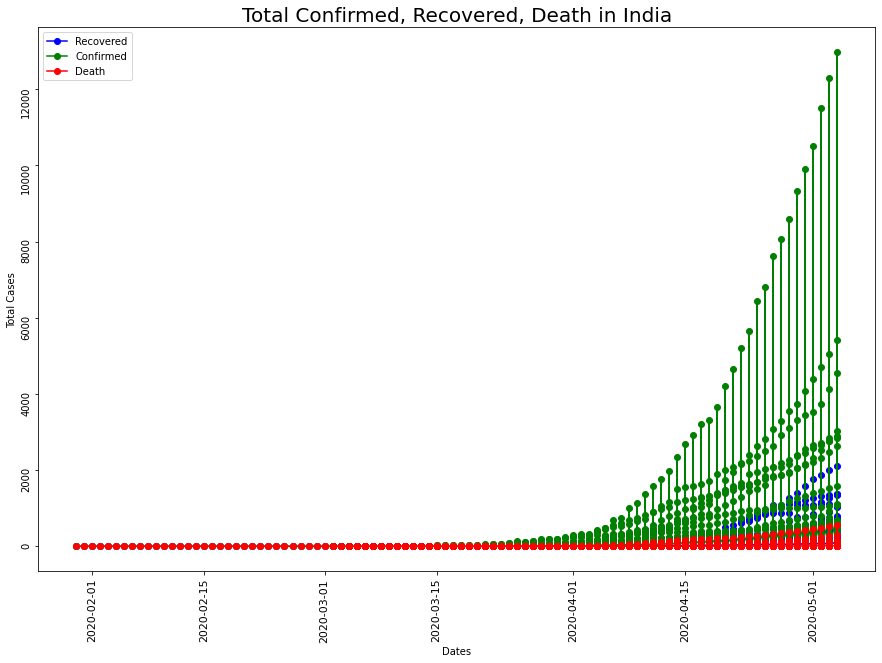

In [0]:
plt.figure(figsize=(15,10))
plt.xticks(rotation = 90,fontsize=11)
plt.yticks(rotation=90)
plt.xlabel("Dates")
plt.ylabel("Total Cases")
plt.title("Total Confirmed, Recovered, Death in India" , fontsize = 20)

ax1 = plt.plot_date(x=dates,y=covid['Cured/Discharged/Migrated'],label = 'Recovered',linestyle = '-',color='b')
ax2 = plt.plot_date(x=dates,y=covid['Total Confirmed cases'],label = 'Confirmed',linestyle = '-',color='g')
ax3 = plt.plot_date(x=dates,y=covid['Death'],label = 'Death',linestyle = '-',color='r')
plt.legend();

In [0]:
states = covid.groupby('Name of State / UT')['Cured/Discharged/Migrated','Total Confirmed cases','Death'].max().reset_index()

states['Active']=states['Total Confirmed cases']-(states['Cured/Discharged/Migrated']+states['Death'])
states['Death Rate per 100'] = np.round(100*states['Death']/states['Total Confirmed cases'],2)
states['Cure Rate per 100'] = np.round(100*states['Cured/Discharged/Migrated']/states['Total Confirmed cases'],2)

states.sort_values('Total Confirmed cases', ascending= False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Name of State / UT,Cured/Discharged/Migrated,Total Confirmed cases,Death,Active,Death Rate per 100,Cure Rate per 100
18,Maharashtra,2115,12974,548,10311,4.22,16.30
9,Gujarat,1042,5428,290,4096,5.34,19.20
7,Delhi,1362,4549,64,3123,1.41,29.94
26,Tamil Nadu,1379,3023,30,1614,0.99,45.62
25,Rajasthan,1356,2886,71,1459,2.46,46.99
17,Madhya Pradesh,798,2846,156,1892,5.48,28.04
32,Uttar Pradesh,754,2645,43,1848,1.63,28.51
1,Andhra Pradesh,488,1583,33,1062,2.08,30.83
24,Punjab,117,1102,21,964,1.91,10.62
27,Telengana,490,1082,29,563,2.68,45.29


In [0]:
df1 = covid['Total Confirmed cases'].values.tolist()
df1

[1,
 1,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 1,
 1,
 3,
 1,
 1,
 14,
 3,
 1,
 1,
 6,
 2,
 14,
 3,
 1,
 1,
 7,
 3,
 14,
 3,
 1,
 1,
 7,
 3,
 14,
 3,
 1,
 1,
 1,
 2,
 7,
 3,
 14,
 8,
 1,
 1,
 1,
 2,
 7,
 4,
 14,
 1,
 9,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 7,
 4,
 14,
 4,
 15,
 5,
 1,
 1,
 1,
 1,
 1,
 2,
 7,
 5,
 14,
 4,
 17,
 10,
 1,
 3,
 1,
 1,
 1,
 2,
 9,
 1,
 6,
 14,
 4,
 17,
 11,
 1,
 3,
 1,
 1,
 1,
 3,
 11,
 1,
 6,
 14,
 5,
 17,
 11,
 1,
 3,
 1,
 1,
 1,
 3,
 11,
 1,
 7,
 14,
 6,
 19,
 14,
 1,
 3,
 1,
 1,
 2,
 3,
 12,
 1,
 7,
 14,
 6,
 23,
 32,
 1,
 4,
 1,
 3,
 2,
 3,
 13,
 1,
 1,
 7,
 14,
 6,
 23,
 32,
 1,
 1,
 4,
 1,
 3,
 3,
 4,
 13,
 1,
 1,
 8,
 15,
 11,
 26,
 39,
 1,
 1,
 4,
 1,
 5,
 3,
 6,
 15,
 1,
 1,
 10,
 17,
 11,
 27,
 42,
 1,
 1,
 1,
 4,
 1,
 6,
 3,
 8,
 16,
 1,
 1,
 2,
 1,
 12,
 17,
 14,
 27,
 47,
 1,
 1,
 2,
 7,
 2,
 6,
 1,
 4,
 8,
 19,
 1,
 1,
 2,
 1,
 17,
 2,
 17,
 15,
 28,
 47,
 1,
 1,

In [0]:
df1 = covid['Total Confirmed cases'].values.tolist()

growth_diff = []

for i in range (1,len(df1)):
    growth_diff.append(df1[i]/df1[i-1])

growth_fac = sum(growth_diff)/len(growth_diff)
print('Average growth factor',growth_fac)

Average growth factor 24.46586514771264


In [0]:
covid['Date'] =pd.to_datetime(covid['Date'])
covid['day'] = covid['Date'].dt.day
covid['month'] = covid['Date'].dt.month
covid['dayofweek'] = covid['Date'].dt.dayofweek
covid['dayofyear'] = covid['Date'].dt.dayofyear
covid['quarter'] = covid['Date'].dt.quarter
covid['weekofyear'] = covid['Date'].dt.weekofyear

In [0]:
covid = covid.drop(['Date'],1)

In [0]:
labelencoder =LabelEncoder()
covid['Name of State / UT'] = labelencoder.fit_transform(covid['Name of State / UT'])
covid

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured/Discharged/Migrated,Latitude,Longitude,Death,Total Confirmed cases,day,month,dayofweek,dayofyear,quarter,weekofyear
0,15,1,0,0,10.8505,76.2711,0,1,30,1,3,30,1,5
1,15,1,0,0,10.8505,76.2711,0,1,31,1,4,31,1,5
2,15,2,0,0,10.8505,76.2711,0,2,1,2,5,32,1,5
3,15,3,0,0,10.8505,76.2711,0,3,2,2,6,33,1,5
4,15,3,0,0,10.8505,76.2711,0,3,3,2,0,34,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1585,26,0,0,1379,11.1271,78.6569,30,3023,4,5,0,125,2,19
1586,27,0,0,490,18.1124,79.0193,29,1082,4,5,0,125,2,19
1587,28,0,0,2,23.9408,91.9882,0,16,4,5,0,125,2,19
1588,32,0,0,754,26.8467,80.9462,43,2645,4,5,0,125,2,19


In [0]:
x = covid.drop(columns='Total Confirmed cases')
y = covid['Total Confirmed cases']

In [0]:
x

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured/Discharged/Migrated,Latitude,Longitude,Death,day,month,dayofweek,dayofyear,quarter,weekofyear
0,15,1,0,0,10.8505,76.2711,0,30,1,3,30,1,5
1,15,1,0,0,10.8505,76.2711,0,31,1,4,31,1,5
2,15,2,0,0,10.8505,76.2711,0,1,2,5,32,1,5
3,15,3,0,0,10.8505,76.2711,0,2,2,6,33,1,5
4,15,3,0,0,10.8505,76.2711,0,3,2,0,34,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1585,26,0,0,1379,11.1271,78.6569,30,4,5,0,125,2,19
1586,27,0,0,490,18.1124,79.0193,29,4,5,0,125,2,19
1587,28,0,0,2,23.9408,91.9882,0,4,5,0,125,2,19
1588,32,0,0,754,26.8467,80.9462,43,4,5,0,125,2,19


In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [0]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
model.score(x_test,y_test)

0.9791357425772699

In [0]:
y_predict = model.predict(x_test)
y_predict

array([ 3.02590011e+02,  7.24252924e+00,  1.22234333e+02,  1.41054554e+02,
        6.27408242e+01,  4.68928683e+01,  1.38757527e+01,  2.94867297e+02,
        1.58018636e+01,  1.29443413e+02,  1.30796136e+02, -6.05017646e-01,
       -1.66509013e+01,  8.63931432e+01,  5.51965734e+02,  8.08420730e+01,
        1.40613050e+02,  4.44858669e+02,  5.77164631e+01,  6.01399114e+01,
        4.97807097e+02,  5.96233724e+01,  2.25970225e+02,  4.83940448e+01,
        1.20620415e+02,  1.49544187e+01, -6.20123179e+00,  8.40664273e+02,
        7.10690036e+03, -1.15004735e+01,  1.56200543e+02,  5.10355976e+01,
        7.59515098e+01,  2.20824369e+02,  8.81806620e+01,  3.88164078e+00,
       -8.81354271e+00,  1.01196907e+02,  3.21555458e+02,  1.63689953e+02,
        2.66419603e+03,  5.34352820e+01,  1.94763344e+02,  2.92685185e+02,
        2.26359314e+03,  2.34926269e-01,  1.19796403e+02,  3.51346230e+01,
        6.17612877e+01,  2.65269669e+02,  5.83813762e+00, -1.84499300e+01,
        1.07651092e+02,  

In [0]:
mse = round(mean_squared_error(y_predict, y_test),2)
mae = round(mean_absolute_error(y_predict, y_test),2)
rmse= round(np.sqrt(mean_squared_error(y_predict, y_test)),2)

In [0]:
mse

35670.11

In [0]:
mae

103.85

In [0]:
rmse

188.87